In [1]:
# Exploring clustering

include("readclassjson.jl")
data = readclassjson("banknotes.json")
U = data["U"]

200×6 Matrix{Float64}:
 214.8  131.0  131.1   9.0   9.7  141.0
 214.6  129.7  129.7   8.1   9.5  141.7
 214.8  129.7  129.7   8.7   9.6  142.2
 214.8  129.7  129.6   7.5  10.4  142.0
 215.0  129.6  129.7  10.4   7.7  141.8
 215.7  130.8  130.5   9.0  10.1  141.4
 215.5  129.5  129.7   7.9   9.6  141.6
 214.5  129.6  129.2   7.2  10.7  141.7
 214.9  129.4  129.7   8.2  11.0  141.9
 215.2  130.4  130.3   9.2  10.0  140.7
 215.3  130.4  130.3   7.9  11.7  141.8
 215.1  129.5  129.6   7.7  10.5  142.2
 215.2  130.8  129.6   7.9  10.8  141.4
   ⋮                                ⋮
 214.8  129.9  130.2   9.6  11.9  139.4
 214.6  130.3  130.2  12.7   9.1  139.2
 215.1  130.2  129.8  10.2  12.0  139.4
 215.4  130.5  130.6   8.8  11.0  138.6
 214.7  130.3  130.2  10.8  11.1  139.2
 215.0  130.5  130.3   9.6  11.0  138.5
 214.9  130.3  130.5  11.6  10.6  139.8
 215.0  130.4  130.3   9.9  12.1  139.6
 215.1  130.3  129.9  10.3  11.5  139.7
 214.8  130.3  130.4  10.6  11.1  140.0
 214.7  130.7  130.

In [2]:
using Statistics

U_mean = mean(U, dims=1)
U_std = std(U, dims=1)

X = (U .- U_mean) ./ U_std

200×6 Matrix{Float64}:
 -0.254943    2.43335    2.82994   -0.289007  -1.18376     0.448247
 -0.786076   -1.16751   -0.634788  -0.912015  -1.43285     1.05575
 -0.254943   -1.16751   -0.634788  -0.496676  -1.30831     1.48967
 -0.254943   -1.16751   -0.882269  -1.32735   -0.311976    1.3161
  0.276189   -1.4445    -0.634788   0.680118  -3.67459     1.14253
  2.13515     1.87937    1.34506   -0.289007  -0.6856      0.795389
  1.60402    -1.72148   -0.634788  -1.05046   -1.30831     0.968961
 -1.05164    -1.4445    -1.87219   -1.53502    0.0616479   1.05575
  0.0106226  -1.99847   -0.634788  -0.842792   0.435272    1.22932
  0.807321    0.771414   0.850096  -0.15056   -0.810141    0.187891
  1.07289     0.771414   0.850096  -1.05046    1.30706     1.14253
  0.541755   -1.72148   -0.882269  -1.18891   -0.187435    1.48967
  0.807321    1.87937   -0.882269  -1.05046    0.186189    0.795389
  ⋮                                                        ⋮
 -0.254943   -0.61353    0.602615   0.126

In [3]:
using Clustering
using LinearAlgebra

r = kmeans(transpose(X), 2)
@assert nclusters(r) == 2
centers = r.centers

6×2 Matrix{Float64}:
  0.143406  -0.12216
 -0.643637   0.548284
 -0.723558   0.616364
 -0.796894   0.678836
 -0.644988   0.549435
  0.939718  -0.8005

In [4]:
c = counts(r)
# Cluster 1 has 92, cluster 2 has 108 points.

2-element Vector{Int64}:
  92
 108

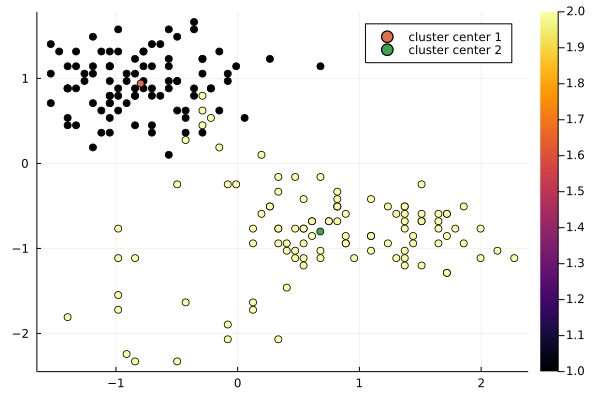

In [5]:
using Plots
scatter(X[:, 4], X[:, 6], marker_z=r.assignments, label="")
scatter!([centers[4, 1]], [centers[6, 1]], label="cluster center 1")
scatter!([centers[4, 2]], [centers[6, 2]], label="cluster center 2")